In [3]:
import gp

from jax.config import config; config.update("jax_enable_x64", True)
import jax
import jax.numpy as np

import numpy as onp

import matplotlib.pyplot as plt
import seaborn as sns

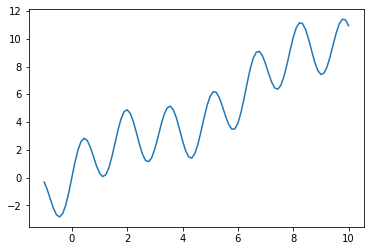

In [19]:
def plot_gp(mu, cov, X, samples=[]):
    X = X.reshape(-1)
    mu = mu.reshape(-1)

    # 95% confidence interval
    uncertainty = 1.96 * np.sqrt(np.diag(cov))
    
    plt.figure(figsize=[8,8])
    plt.subplot(211)
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')

    for i, sample in enumerate(samples):
        plt.plot(X, sample, lw=1, ls='--', label='sample_{}'.format(i))

    plt.legend()
    plt.subplot(212)
    plt.plot(X[:,np.newaxis],gp.acquisition.UCB(mu_s,np.sqrt(np.diag(cov_s).reshape(-1,1))))
    
def f(x):
    return 1*np.sin(x)+2*np.sin(4*x)+x
plt.plot(np.linspace(-1,10,100),f(np.linspace(-1,10,100)))

In [190]:
#define my original kernel
def kernel(x,y):
    g = gp.kernel.GaussianRBFKernel(a=1.,h=0.5)
    p = gp.kernel.PeriodicKernel(h=1,a=1.,p=0.5)
    return g(x,y)+p(x,y)+np.dot(x,y.T)

In [191]:
# %%timeit
X = np.linspace(-1,10,100)
X_train = np.arange(0,7,0.5)
Y_train = f(X_train)
a = gp.GPR(X_train,Y_train,alpha=0.5,
                kernel=kernel)
# a = bayesopt.GPR(X_train,Y_train,alpha=0.0001,
#                 kernel=gp.kernel.GaussianRBF(h=2,a=1))
mu_s, cov_s = a.posterior_predictive(X,return_cov=True)
samples = onp.random.multivariate_normal(mu_s.reshape(-1), cov_s, 2)
samples = np.row_stack([samples,f(X)])

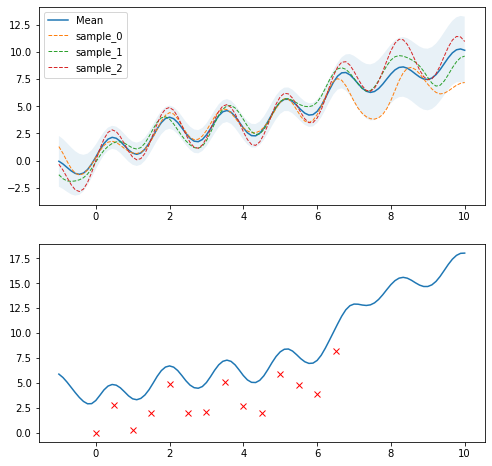

In [192]:
plot_gp(mu_s, cov_s, X, samples)
plt.plot(X_train, Y_train, 'rx')